In [1]:
import pandas as pd

url = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(url)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [2]:
mapa = {
    "expected_hours":"horas_esperadas",
    "price":"preco",
    "unfinished":"nao_finalizado"
}

dados = dados.rename(columns = mapa)

In [3]:
trocar = {
    0 : 1,
    1: 0 
    }

dados['finalizado'] = dados.nao_finalizado.map(trocar)
dados

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0
...,...,...,...,...
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1


In [4]:
x = dados[["horas_esperadas", "preco"]]
y = dados['finalizado']

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 20
np.random.seed(SEED)
raw_treino_x2, raw_teste_x2, treino_y2, teste_y2 = train_test_split(x,y, test_size = 0.25, stratify = y)

print(treino_x2.shape)
print(teste_x2.shape)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x2), len(teste_x2)))

scaler = StandardScaler()
scaler.fit(raw_treino_x2)
treino_x2 = scaler.transform(raw_treino_x2)
teste_x2 = scaler.transform(raw_teste_x2)

model = SVC(gamma='auto')

model.fit(treino_x2, treino_y2)

previsoes = model.predict(teste_x2)

acuracia = accuracy_score(teste_y2, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

(1617, 2)
(540, 2)
Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 70.37%


In [50]:
data_x = teste_x2[:,0]
data_y = teste_x2[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()
print(x_min, x_max, y_min, y_max)

-1.7268515859610238 1.7388670645003195 -0.5974614834809422 4.8846312657487605


In [51]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [52]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

In [53]:
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)

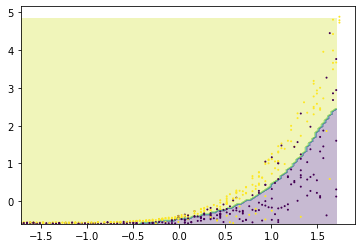

In [54]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y2, s=1)

#DECISION BOUNDARY